### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 35kB/s 
     |████████████████████████████████| 3.8MB 44.8MB/s 
     |████████████████████████████████| 450kB 45.6MB/s 
ERROR: tensorflow 2.1.0rc1 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.1.0rc1 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0


In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
#From tensorflow v2.0 onwards, Eager Execution will be enabled by default

2.0.0


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.random.set_seed(42)

### Collect Data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(test_labels[0:5])

[9 2 1 1 6]


In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

In [11]:
train_images.dtype

dtype('uint8')

In [12]:
print(train_labels.shape)
print('First 5 examples are: ', train_labels[0:2])

(60000,)
('First 5 examples are: ', array([9, 0], dtype=uint8))


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
train_labels_OH = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_OH = tf.keras.utils.to_categorical(test_labels, num_classes=10)

###Print shape and some values

In [15]:
print(train_labels_OH.shape)
print('First 5 examples now are: ', train_labels_OH[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [16]:
print(test_labels_OH.shape)
print('First 5 examples now are: ', test_labels_OH[0:5])

(10000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


In [56]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels_OH.shape)
print(test_labels_OH.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 10)
(10000, 10)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

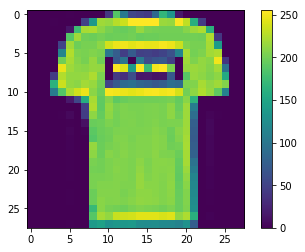

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

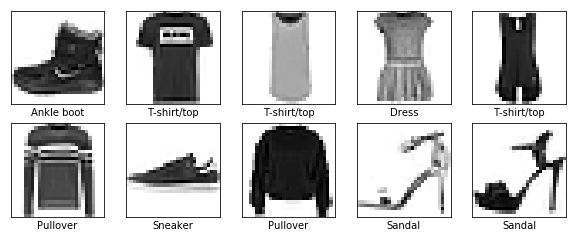

In [22]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
print('Before datatype')
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)
print(train_labels_OH.dtype)
print(test_labels_OH.dtype)
train_images =np.array(train_images).astype('float32')
train_labels = np.array(train_labels).astype('float32')
test_images =np.array(test_images).astype('float32')
test_labels = np.array(test_labels).astype('float32')
train_labels_OH =np.array(test_images).astype('float32')
test_labels_OH = np.array(test_labels).astype('float32')
print('After datatype')
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)
print(train_labels_OH.dtype)
print(test_labels_OH.dtype)

Before datatype
float64
uint8
float64
uint8
float32
float32
After datatype
float32
float32
float32
float32
float32
float32


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [77]:
tf.__version__

'2.0.0'

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [28]:
train_images.shape[0]

60000

In [55]:
model.fit(train_images, train_labels_OH, validation_data=(test_images, test_labels_OH), epochs=50,
          batch_size = train_images.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 17us/sample - loss: 2.4272 - accuracy: 0.1350 - val_loss: 2.3778 - val_accuracy: 0.1674
Epoch 2/50
60000/60000 [==============================] - 0s 6us/sample - loss: 2.3743 - accuracy: 0.1699 - val_loss: 2.3337 - val_accuracy: 0.1979
Epoch 3/50
60000/60000 [==============================] - 0s 6us/sample - loss: 2.3302 - accuracy: 0.2000 - val_loss: 2.2957 - val_accuracy: 0.2162
Epoch 4/50
60000/60000 [==============================] - 0s 6us/sample - loss: 2.2921 - accuracy: 0.2187 - val_loss: 2.2621 - val_accuracy: 0.2278
Epoch 5/50
60000/60000 [==============================] - 0s 6us/sample - loss: 2.2584 - accuracy: 0.2306 - val_loss: 2.2319 - val_accuracy: 0.2365
Epoch 6/50
60000/60000 [==============================] - 0s 7us/sample - loss: 2.2281 - accuracy: 0.2405 - val_loss: 2.2043 - val_accuracy: 0.2455
Epoch 7/50
60000/60000 [==============================] - 0s 

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [52]:
model1.fit(train_images, train_labels_OH, validation_data=(test_images, test_labels_OH), epochs=50,
          batch_size = train_images.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8943 - accuracy: 0.6946 - val_loss: 1.3707 - val_accuracy: 0.6495
Epoch 2/50
60000/60000 [==============================] - 1s 14us/sample - loss: 0.8892 - accuracy: 0.6962 - val_loss: 1.3629 - val_accuracy: 0.6517
Epoch 3/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.8842 - accuracy: 0.6978 - val_loss: 1.3551 - val_accuracy: 0.6541
Epoch 4/50
60000/60000 [==============================] - 1s 14us/sample - loss: 0.8794 - accuracy: 0.6994 - val_loss: 1.3475 - val_accuracy: 0.6567
Epoch 5/50
60000/60000 [==============================] - 1s 14us/sample - loss: 0.8747 - accuracy: 0.7009 - val_loss: 1.3399 - val_accuracy: 0.6583
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8702 - accuracy: 0.7021 - val_loss: 1.3325 - val_accuracy: 0.6602
Epoch 7/50
60000/60000 [==============================] 

In [57]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [86]:
keras.optimizers.SGD(learning_rate=0.01)

In [0]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Comile the model
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
#Execute the model
model2.fit(train_images, train_labels_OH, validation_data=(test_images, test_labels_OH), epochs=50,
          batch_size = train_images.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/sample - loss: 3.2814 - accuracy: 0.0495 - val_loss: 2.4223 - val_accuracy: 0.1078
Epoch 2/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.9189 - accuracy: 0.0741 - val_loss: 2.3144 - val_accuracy: 0.1484
Epoch 3/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.6161 - accuracy: 0.1095 - val_loss: 2.2267 - val_accuracy: 0.1863
Epoch 4/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.3646 - accuracy: 0.1590 - val_loss: 2.1543 - val_accuracy: 0.2199
Epoch 5/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.1566 - accuracy: 0.2158 - val_loss: 2.0937 - val_accuracy: 0.2466
Epoch 6/50
60000/60000 [==============================] - 1s 14us/sample - loss: 1.9854 - accuracy: 0.2727 - val_loss: 2.0421 - val_accuracy: 0.2785
Epoch 7/50
60000/60000 [==============================] 

In [90]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model3 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model3.add(tf.keras.layers.Dense(100, activation='sigmoid', name='Layer_1'))
model3.add(tf.keras.layers.Dense(100, activation='sigmoid', name='Layer_2'))
model3.add(tf.keras.layers.Dense(10, activation='sigmoid', name='Layer_3'))

#Output layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
#Compile the model with sgd optimizer learning_rate 0.03
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [93]:
#Execute the model
model3.fit(train_images, train_labels_OH, validation_data=(test_images, test_labels_OH), epochs=50,
          batch_size = train_images.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/sample - loss: 2.3985 - accuracy: 0.1000 - val_loss: 2.3929 - val_accuracy: 0.1000
Epoch 2/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3957 - accuracy: 0.1000 - val_loss: 2.3903 - val_accuracy: 0.1000
Epoch 3/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3929 - accuracy: 0.1000 - val_loss: 2.3878 - val_accuracy: 0.1000
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3902 - accuracy: 0.1000 - val_loss: 2.3853 - val_accuracy: 0.1000
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3876 - accuracy: 0.1000 - val_loss: 2.3830 - val_accuracy: 0.1000
Epoch 6/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3850 - accuracy: 0.1000 - val_loss: 2.3807 - val_accuracy: 0.1000
Epoch 7/50
60000/60000 [==============================] 

## Review model

In [99]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_OH, verbose=2)

print('Test accuracy:-', test_acc)

10000/1 - 0s - loss: 1.6564 - accuracy: 0.5336
('Test accuracy:-', 0.5336)


In [95]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Layer_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
Output (Dense)               (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_____________________________________________